# Census Income Project


## Importing Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Data Collection and Exploration

In [2]:
# Loading the dataset
df=pd.read_csv("census_income.csv")

# printing the first 5 rows of the dataframe
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
# checking the number of rows and columns in the dataset
df.shape

(32560, 15)

- In our dataset, we have 32560 rows and 15 columns including the target variable "Income".

In [4]:
#getting some information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


- From this we can say that there are no missing values in the dataset. We have 6 columns having integer values and 9 columns having string values.

In [5]:
# checking the unique value counts for each column
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

- Here we see that Education and Education_num has same number of unique values, there could be a reason for it. We shall see it further.

In [6]:
# checking all the column names
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [7]:
# checking missing values
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

- This shows that there are no missing values in our dataset.

In [8]:
# checking the unique value counts for target variable "Income"
df["Income"].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

- From this we can say that its a binary classification. The prediction task is to determine whether a person makes over dollar 50K a year or not. 
- Majority of people has the income less or equal to 50K. This imbalance in the dataset may affect our model building. 

In [9]:
# checking unqiue value counts for Workclass feature
df["Workclass"].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

- As we have noticed the data do not contains any null values but it has question marks(?) as above. So we have options either we can drop those values or can replace them with mode values. This we shall deal later.
- Majority of the people belongs to Private workclass.

In [10]:
# checking unqiue value counts for Education feature
df["Education"].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

- Majority of people have HS-grad as the highest education degree and very few people has lowest degree of education that is Preschool.

In [11]:
# checking unqiue value counts for Education_num feature
df["Education_num"].value_counts()

9     10501
10     7291
13     5354
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: Education_num, dtype: int64

- Comparing the "Education" and "Education_num" unique value counts we can conclude that Education_num is the encoded ordinal column. 
- Here lowest value "1" is for Preschool degree and highest value "16" is for "Doctorate" degree.
- So we can drop one of these columns as both are same and we already have the encoded values as per the increase in degree level.

In [12]:
# checking the unique value counts for Marital_status
df["Marital_status"].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

- Married-civ-spouse => Civilian spouse
- Married-AF-spouse => Spouse in the Armed Forces

In [13]:
# checking unique value counts for Occupation feature
df["Occupation"].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

- Majority of the people has Prop-specialty as their occupation.
- For this feature too we observe 1843 question mark(?) values. We need to treat them.

In [14]:
# checking unique value counts for Relationship column
df["Relationship"].value_counts()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

- In our data we have majority of husbands.

In [15]:
# checking unique value counts of Race
df["Race"].value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

- We have maximum number of White people.

In [16]:
# checking unique value counts of Gender column
df["Sex"].value_counts()

 Male      21789
 Female    10771
Name: Sex, dtype: int64

- In our dataset we have maximum number of Males.

In [17]:
df["Native_country"].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

- Majority of people belongs to United-States.
- Here also we see missing values in the form of question mark(?). We shall treat it further. 

In [18]:
# statistical information
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32560.0,38.581634,13.640642,17.0,28.0,37.0,48.0,90.0
Fnlwgt,32560.0,189781.814373,105549.764924,12285.0,117831.5,178363.0,237054.5,1484705.0
Education_num,32560.0,10.080590,2.572709,1.0,9.0,10.0,12.0,16.0
Capital_gain,32560.0,1077.615172,7385.402999,0.0,0.0,0.0,0.0,99999.0
Capital_loss,32560.0,87.306511,402.966116,0.0,0.0,0.0,0.0,4356.0
Hours_per_week,32560.0,40.437469,12.347618,1.0,40.0,40.0,45.0,99.0


#### Statistical Observations:
- The minimum value for Age feature is 17 and maximum is 90. Age ranges from 17 to 90. From Mean and median of Age we can say that the distribution is normal. Outliers could be present as there is a difference between 75th percentile and max value.
- Hours_per_week value ranges from 1 to 99 hours. The distribution for Hours_per_week is also normal however outliers could be present.
- Distribution for Fnlwgt is not normal. Also outliers could be present.
- Distribution for Capital_gain and Capita_loss is not normal. Also there are extreme outliers present. 

## Exploratory Data Analysis

### A] Univariate Analysis

#### Numerical Columns' Visualization

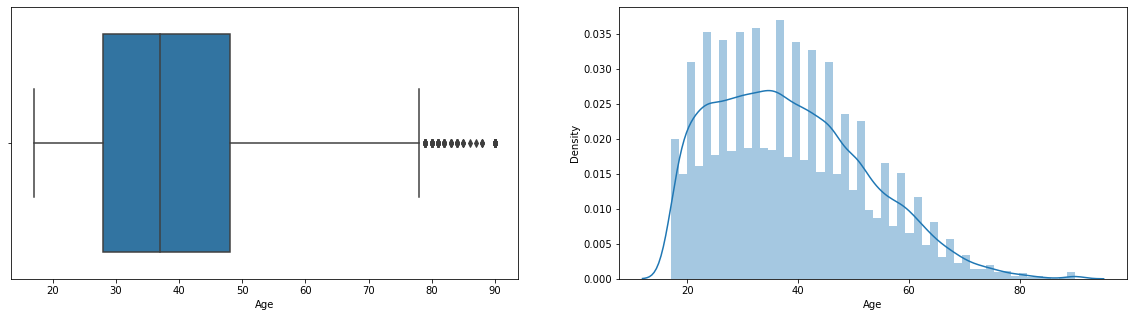

In [19]:
# Age
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.boxplot(df["Age"])
plt.subplot(1,2,2)
sns.distplot(df["Age"]);

#### Observation:
- The Age value ranges from 17 to 90.
- The distribution of the variable Age is right-skewed. Also there are few outliers present.

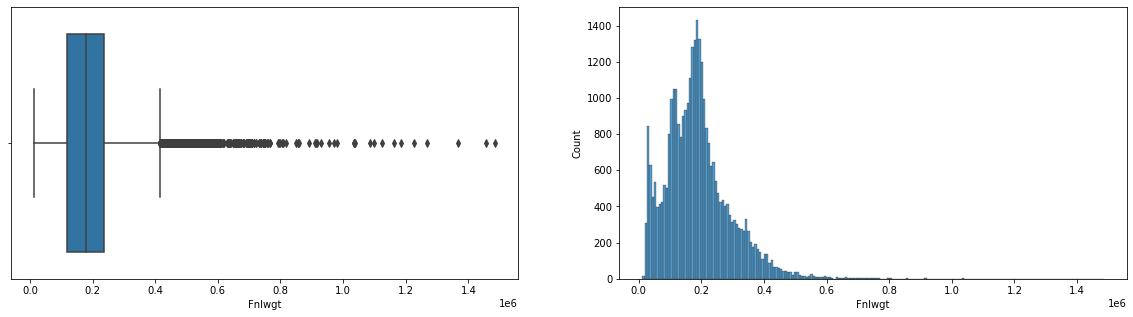

In [20]:
# Fnlwgt
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.boxplot(df["Fnlwgt"])
plt.subplot(1,2,2)
sns.histplot(df["Fnlwgt"]);

#### Observation:
- The distribution of Fnlwgt attribute is right-skewed.
- There are many extreme outliers present.

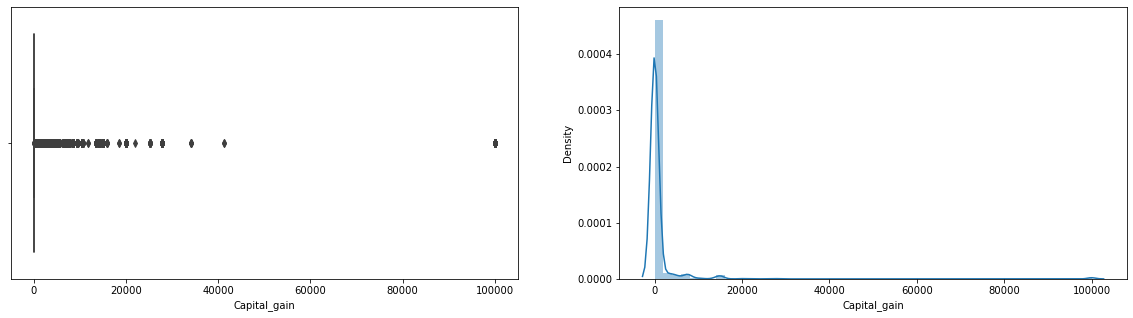

In [21]:
# Capital_gain
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.boxplot(df["Capital_gain"])
plt.subplot(1,2,2)
sns.distplot(df["Capital_gain"]);

#### Observation:
- Capital_gain ranges from 0 to 10000.
- The distribution is right skewed, it could be because of the one extreme outlier present as we can see in the boxplot.

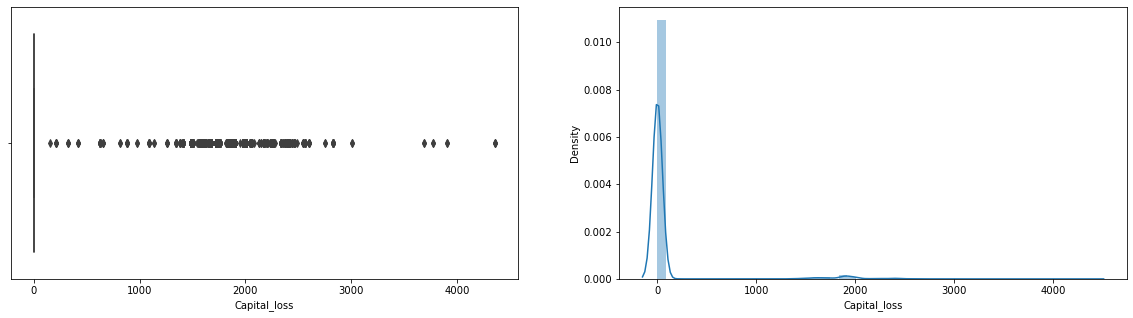

In [22]:
# Capital_loss
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.boxplot(df["Capital_loss"])
plt.subplot(1,2,2)
sns.distplot(df["Capital_loss"]);

#### Observation:
- Capital_loss values ranges from 0 to 4300.
- The distribution is extremely right-skewed due to too many extreme outliers present.

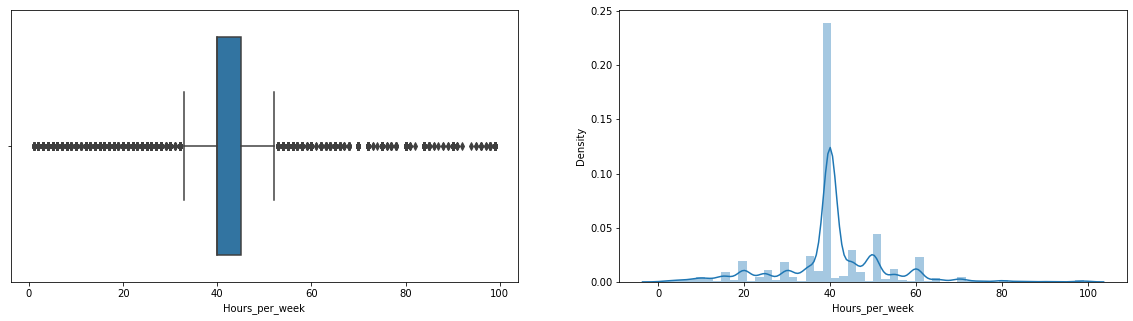

In [23]:
# Hours_per_week
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.boxplot(df["Hours_per_week"])
plt.subplot(1,2,2)
sns.distplot(df["Hours_per_week"]);

#### Observation:
- Hours_per_week values ranges from 1 to 99. However, majority of the people are working 40 hours per week.
- The distribution is slightly normal. However, we still need to do transformation.

#### Categorical Columns' Visualization

<AxesSubplot:xlabel='Income', ylabel='count'>

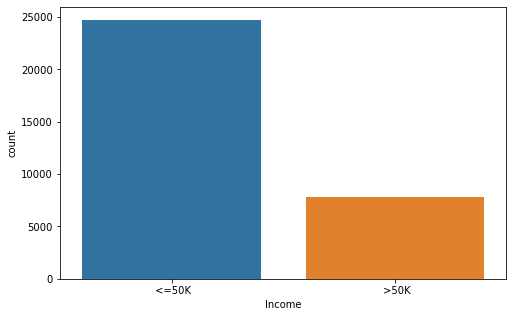

In [24]:
# Income
plt.figure(figsize=(8,5))
sns.countplot(df['Income'])

#### Observation:
- In the dataset majority of the samples have income <=50K.

<AxesSubplot:xlabel='Workclass', ylabel='count'>

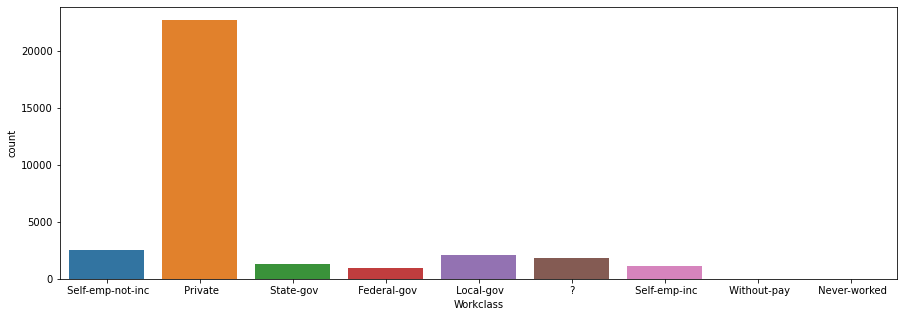

In [25]:
# Workclass
plt.figure(figsize=(15,5))
sns.countplot(df['Workclass'])

#### Observation:
- In the dataset majority of the samples belongs to Private Workclass. 
- There are very few who belongs to Without-pay and Never-worked category, we can combine them to one. 
- Also we see question mark category, we need to to fill these values for better model building.

<AxesSubplot:xlabel='Education', ylabel='count'>

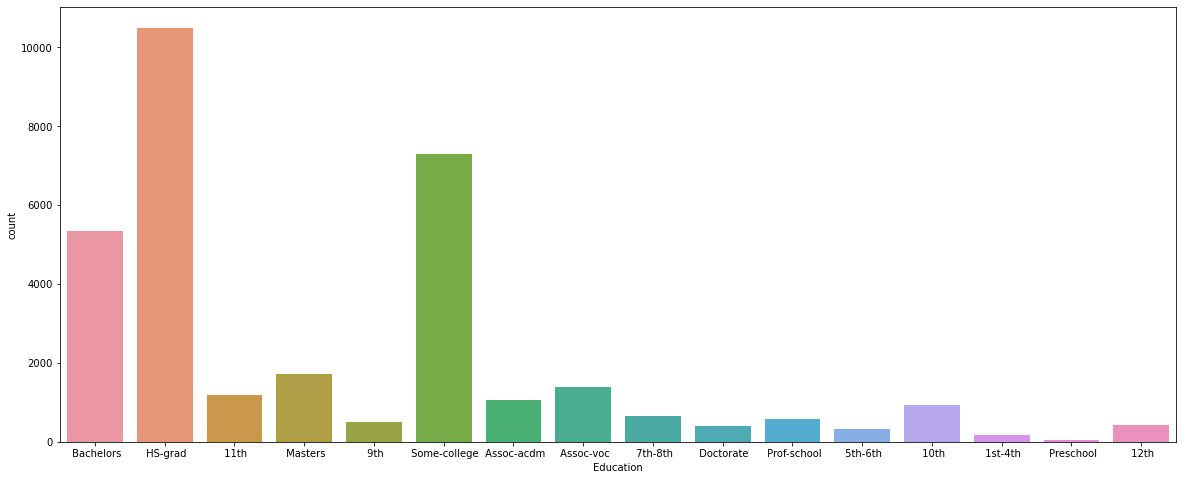

In [26]:
# Education
plt.figure(figsize=(20,8))
sns.countplot(df['Education'])

#### Observation:
- In the dataset majority of the samples have HS-grad and Some-college degree of education.
- Very few have higher degree of education. 

<AxesSubplot:xlabel='Marital_status', ylabel='count'>

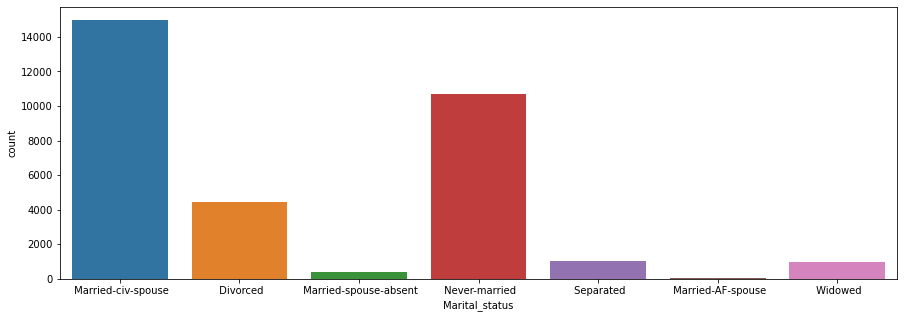

In [27]:
# Marital_status
plt.figure(figsize=(15,5))
sns.countplot(df['Marital_status'])

#### Observation:
- In the dataset majority of the samples are Civilian Spouse.
- Around 11000 belongs to Never-married group.

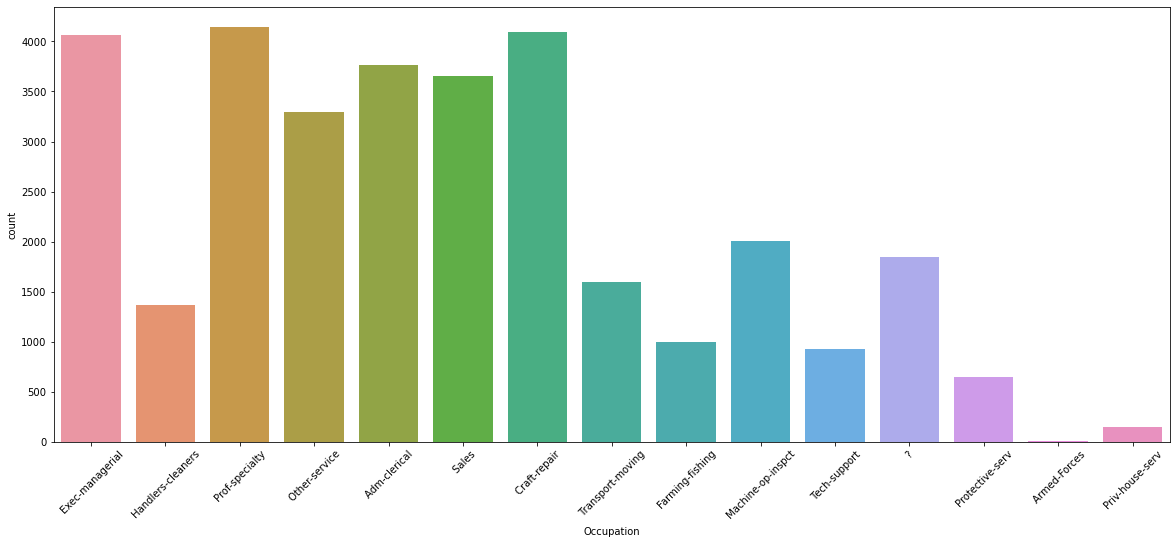

In [28]:
# Occupation
plt.figure(figsize=(20,8))
sns.countplot(df['Occupation'])
plt.xticks(rotation=45);

#### Observation:
- Majority of the samples belongs to Prof-speciality occupation, that is around 6000. 
- There are around 4000 samples of each Exec-managerial and Craft-repair.
- Very few belongs to Armed-Forces and Priv-house-serv.

<AxesSubplot:xlabel='Relationship', ylabel='count'>

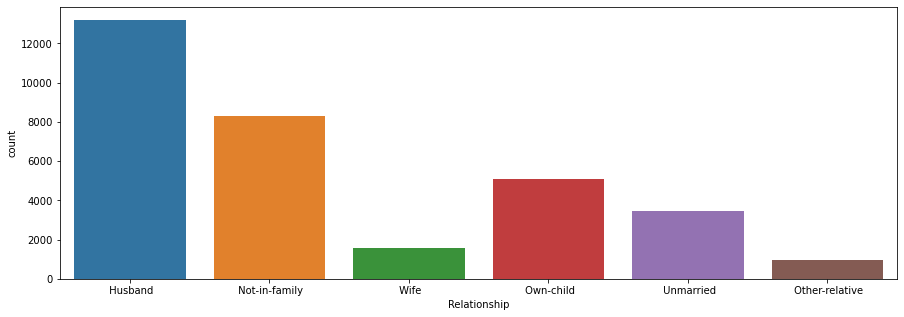

In [29]:
# Relationship
plt.figure(figsize=(15,5))
sns.countplot(df['Relationship'])

#### Observation:
- Majority of the samples are husband
- Around 8000 samples does not belong to any family.

<AxesSubplot:xlabel='Race', ylabel='count'>

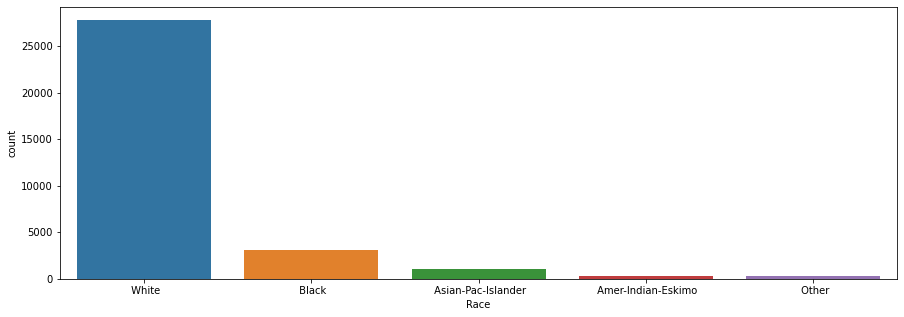

In [30]:
# Race
plt.figure(figsize=(15,5))
sns.countplot(df['Race'])

#### Observation:
- In our dataset we have majority of White People(>25000).

<AxesSubplot:xlabel='Sex', ylabel='count'>

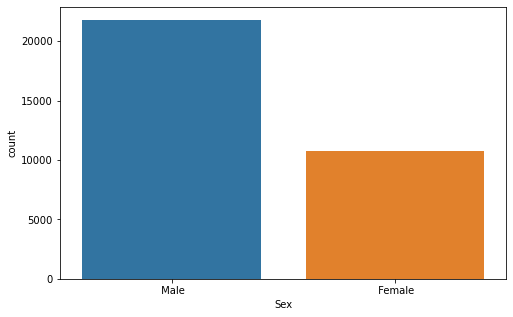

In [31]:
# Sex
plt.figure(figsize=(8,5))
sns.countplot(df['Sex'])

#### Observation:
- There is an imbalance distribution in gender, only about 1/3 of the total individuals are female.

### B] Bivariate Analysis

<AxesSubplot:xlabel='Age', ylabel='Density'>

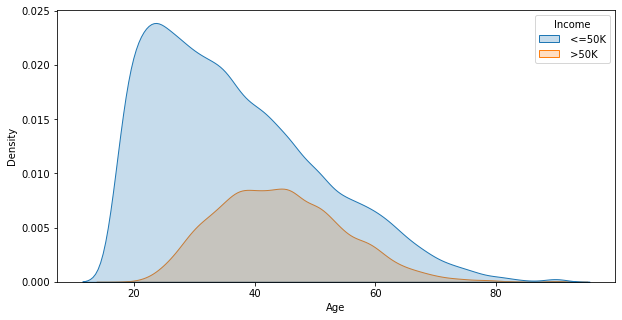

In [32]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=df, x="Age", hue="Income",fill=True)

#### Observation:
- We can see that the distribution of the variable age is right-skewed, especially in the low-income groups (annual income <= 50K).
- Besides, we can also see that the median age of high-income group is higher, which implies the older generation prossess more wealth than the young.

<AxesSubplot:xlabel='Fnlwgt', ylabel='Count'>

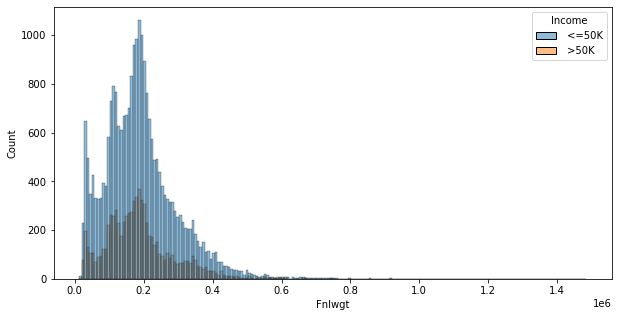

In [33]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x="Fnlwgt", hue="Income",fill=True)

#### Observation:
- As we can see from the figure, there is no significant difference between two income communities in the variable ‘fnlwgt’.

<AxesSubplot:xlabel='Education_num', ylabel='Density'>

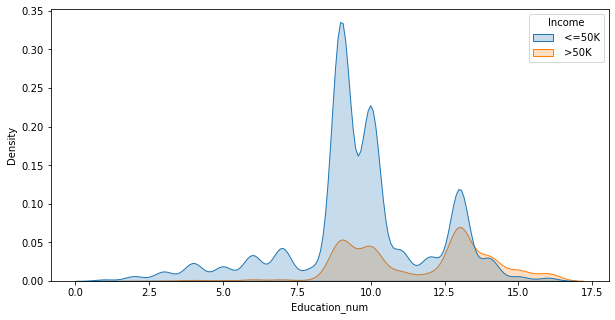

In [34]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=df, x="Education_num", hue="Income",fill=True)

#### Observation:
- From the density plot we can see that, almost every person who earned 50K a year has recieved at least 8 years of education.
- As for the low income group, most of them have 9 to 10 years of education. 
- The interesting part is that there is a lot of people with long-term education carrer but still gainning low annual income.

<AxesSubplot:xlabel='Capital_gain', ylabel='Density'>

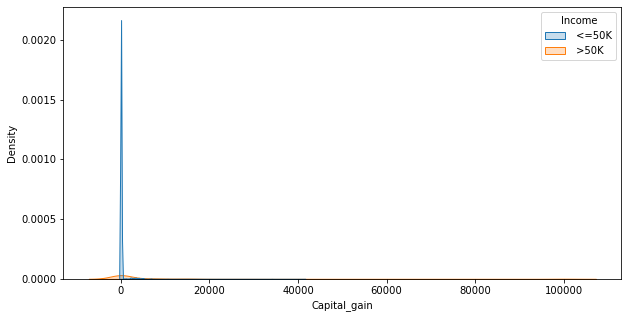

In [35]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=df, x="Capital_gain", hue="Income",fill=True)

<AxesSubplot:xlabel='Capital_loss', ylabel='Density'>

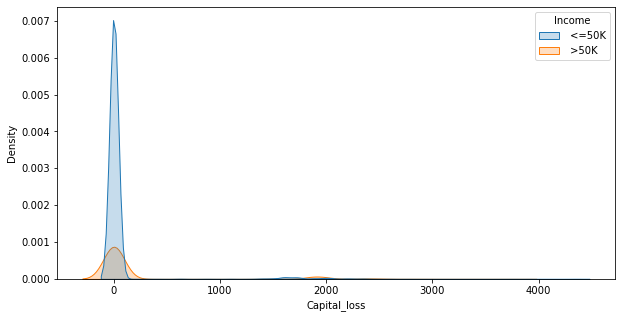

In [36]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=df, x="Capital_loss", hue="Income",fill=True)

#### Observation:
- As for the capital loss and capital gain, from the density plot above we can see that the capital gain gap between the two income groups is huge. 

<AxesSubplot:xlabel='Workclass', ylabel='count'>

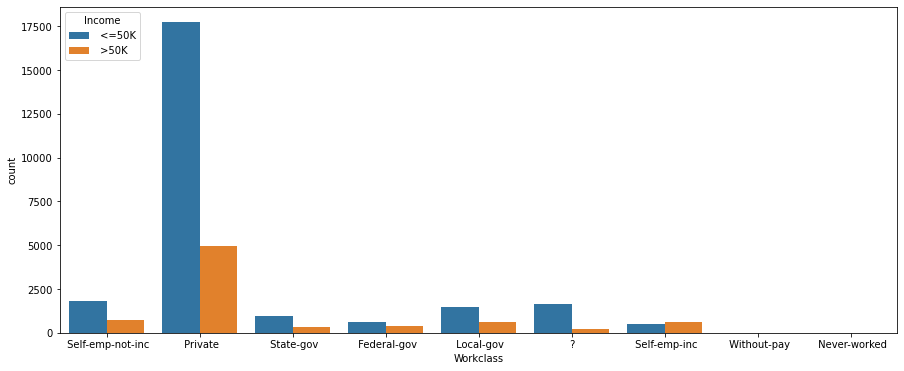

In [37]:
plt.figure(figsize=(15,6))
sns.countplot(x="Workclass",hue="Income",data=df)

#### Observation:
- We can see a clear imbalance inside private workclass internal income.
- Only 1/4th of the total observation have earned more than 50K a year.

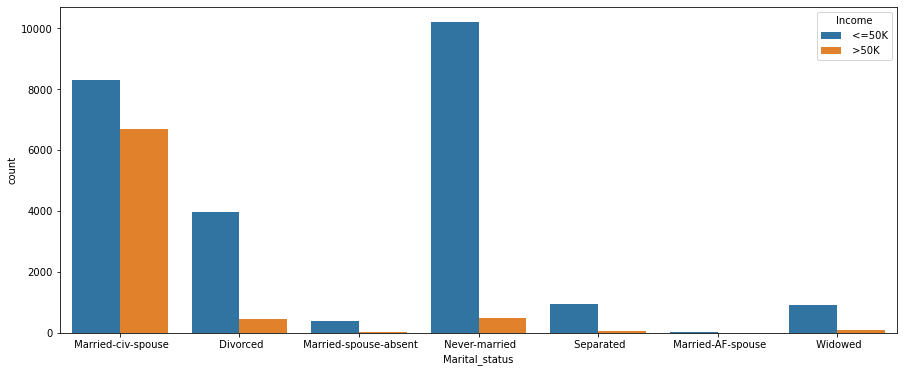

In [38]:
plt.figure(figsize=(15,6))
sns.countplot(x="Marital_status",hue="Income",data=df);

#### Observation:
- The countplot perfectly shows the impact that marriage have on people’s annual income.
- Almost 90% of the never-married group earns less than 50K a year (Same thing within the divorced community). 
- On the opposite, it reveals that most of the high income people are married couples.

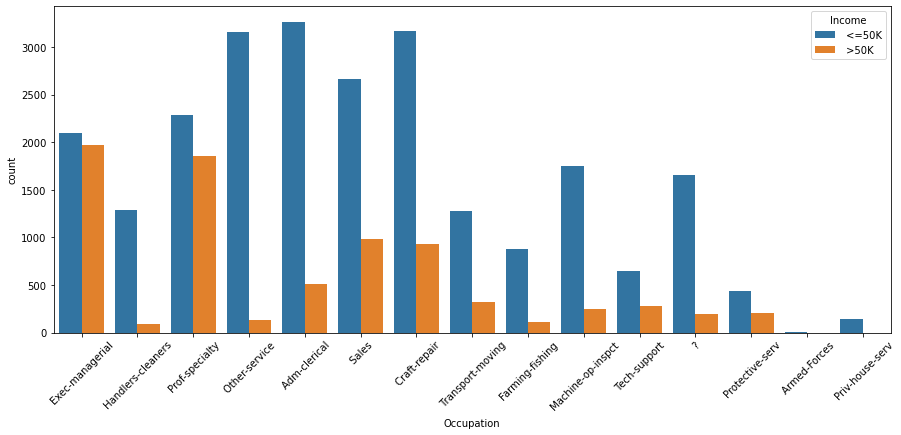

In [39]:
plt.figure(figsize=(15,6))
sns.countplot(x="Occupation",hue="Income",data=df)
plt.xticks(rotation=45);

#### Observation:
- Other-service has the highest proportion of middle and low income.
- Adm-clerical also has a high proportion of low income.
- Prof-specialty & Exec-managerial paid really well! Almost 50% of the people working in the Exec-managerial business can earn more than 50K a year.

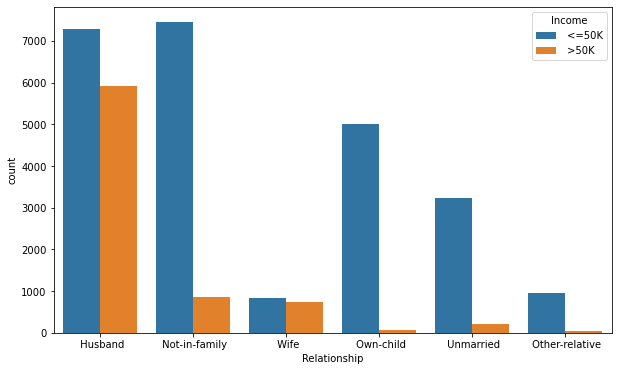

In [40]:
plt.figure(figsize=(10,6))
sns.countplot(x="Relationship",hue="Income",data=df);

#### Observation:
- From the relationship variable, it seems like families with children are overwhelmingly low-income.
- Almost 50% of the Husbands can earn more than 50K a year.
- Those who are Not in Family have high proportion of low income.

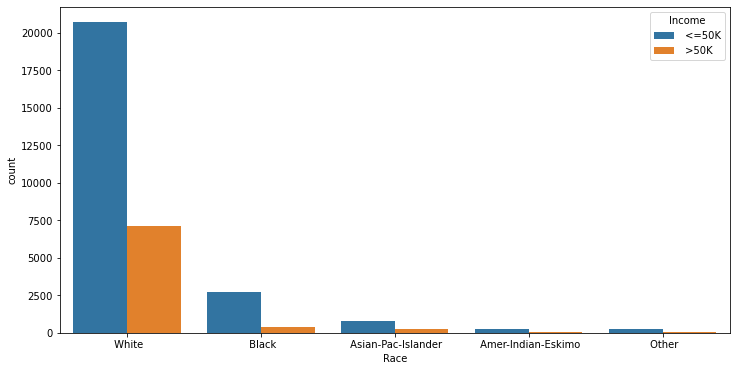

In [41]:
plt.figure(figsize=(12,6))
sns.countplot(x="Race",hue="Income",data=df);

#### Observation:
- There is a racial imbalance in the dataset that might make this variable less vital in the modeling section. 
- Only 1/4th of the White people have income more than 50K a year.

In [42]:
# removing the additional spaces from the Native_country string values
df.Native_country=df.Native_country.str.strip()

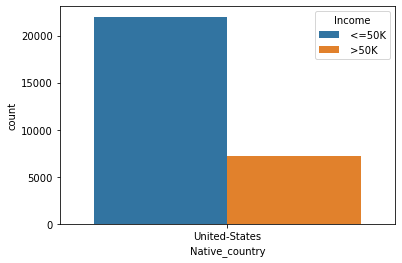

In [43]:
# countplot for United-States and Income
filter1=df.Native_country=='United-States'
df1=df[filter1]
sns.countplot(x="Native_country",hue="Income",data=df1);

#### Observation:
- For U.S low-income groups make up the majority of the population.

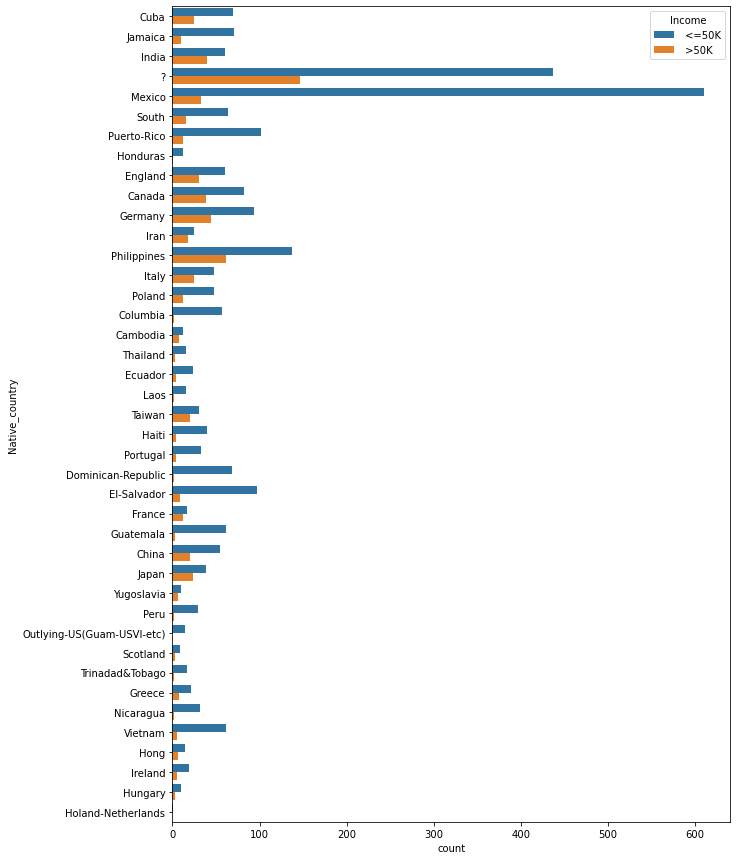

In [44]:
# countplot for Other countries(excluding United-States) and Income
filter1=df.Native_country!='United-States'
df1=df[filter1]
plt.figure(figsize=(10,15))
sns.countplot(y="Native_country",hue="Income",data=df1);

#### Observation:
- ##### Lower income countries:
  - Vietnam
  - Mexico
  - Puerto-Rico
  - Jamaica
  - Guatemala
  - El-Salvador
  - Dominican-Republic
  - Columbia
- ##### Higher income countries:
  - Japan
  - Iran
  - India
  - Germany
  - England
  - Canada
  - United States of America

In [45]:
# remocing additional space from Sex column string values
df.Sex=df.Sex.str.strip()

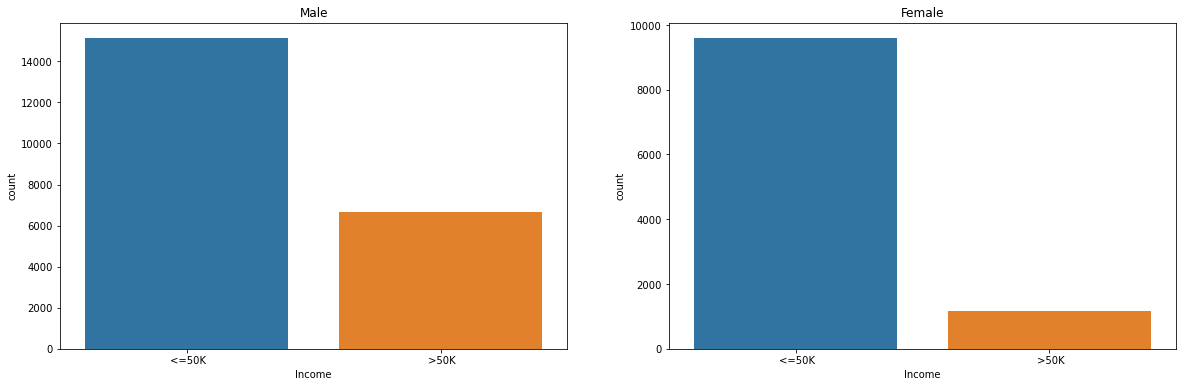

In [46]:
# Plotting countplot for Male and Female versus Income
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
plt.title("Male")
filter1=df.Sex=='Male'
df1=df[filter1]
sns.countplot(x="Income",data=df1);
plt.subplot(1,2,2)
plt.title("Female")
filter1=df.Sex=='Female'
df1=df[filter1]
sns.countplot(x="Income",data=df1);

#### Observation:
- Within the male group, about 30% of the males can earn more than 50K a year. However, within the women group, only 10% of the females are able to make more than 50K a year. 
- This implys that there exist a gap between the income of male and female.

## Treating Missing Values (?)

We have question mark values in three columns,
- Workclass
- Occupation
- Native_country

All these are categorical columns and we can replace their "?" with the Mode and their Modes are as below:
- Workclass => Private
- Occupation => Prof-specialty
- Native_country => United-States

In [47]:
# Workclass
df['Workclass']=df['Workclass'].str.strip().replace(['?'],'Private')

# Occupation
df['Occupation']=df['Occupation'].str.strip().replace(['?'],'Prof-specialty')

# Native_country
df['Native_country']=df['Native_country'].str.strip().replace(['?'],'United-States')

- Let's check if the question mark values are replaced or not!

In [48]:
df['Workclass'].value_counts()

Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: Workclass, dtype: int64

In [49]:
df['Occupation'].value_counts()

Prof-specialty       5983
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3769
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: Occupation, dtype: int64

In [50]:
df['Native_country'].value_counts()

United-States                 29752
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                           29
France                      

- Great! We have filled all the ? values for the above 3 columns.

## Feature Engineering

In [51]:
# Education attribute
df['Education']=df['Education'].str.strip().replace(['Preschool','1st-4th','5th-6th'],'Elementary')
df['Education']=df['Education'].replace(['7th-8th','9th','10th','11th','12th','HS-grad'],'Secondary')
df['Education']=df['Education'].replace(['Some-college','Assoc-voc','Assoc-acdm'],'Post-Secondary')
df['Education']=df['Education'].replace(['Prof-school','Doctorate'],'Ph.D')

In [52]:
df['Education'].value_counts()

Secondary         14202
Post-Secondary     9740
Bachelors          5354
Masters            1723
Ph.D                989
Elementary          552
Name: Education, dtype: int64

In [53]:
# Marital_Status attribute
df['Marital_status']=df['Marital_status'].str.strip().replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'],'Married')
df['Marital_status']=df['Marital_status'].replace(['Divorced','Separated','Widowed'],'Others')

In [54]:
df['Marital_status'].value_counts()

Married          15417
Never-married    10682
Others            6461
Name: Marital_status, dtype: int64

In [55]:
# Workclass attribute
df['Workclass']=df['Workclass'].str.strip().replace(['Without-pay','Never-worked'],'Others')

In [56]:
df['Workclass'].value_counts()

Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Others                 21
Name: Workclass, dtype: int64

In [57]:
# Income
df['Income']=df['Income'].str.strip().replace(['<=50K'],0)

In [58]:
df['Income']=df['Income'].replace(['>50K'],1)

In [59]:
# printing first 5 rows after doing feature engineering
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,Secondary,9,Others,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,Secondary,7,Married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married,Exec-managerial,Wife,White,Female,0,0,40,United-States,0


### Label Encoding

In [60]:
# Education
df.Education=df.Education.replace({"Elementary":0,"Secondary":1,"Post-Secondary":2,"Bachelors":3,"Masters":4,"Ph.D":5})

In [61]:
df['Education'].value_counts()

1    14202
2     9740
3     5354
4     1723
5      989
0      552
Name: Education, dtype: int64

In [62]:
# Workclass,Occupation,Relationship,Race,Native_country
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
features=["Native_country","Occupation","Relationship","Workclass","Race"]
for i in features:
    df[i]=LE.fit_transform(df[i])

### One Hot Encoding

In [63]:
#Marital_status,Sex
df=pd.get_dummies(df,columns=["Marital_status","Sex"])
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Occupation,Relationship,Race,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,Marital_status_Married,Marital_status_Never-married,Marital_status_Others,Sex_Female,Sex_Male
0,50,5,83311,3,13,3,0,4,0,0,13,38,0,1,0,0,0,1
1,38,3,215646,1,9,5,1,4,0,0,40,38,0,0,0,1,0,1
2,53,3,234721,1,7,5,0,2,0,0,40,38,0,1,0,0,0,1
3,28,3,338409,3,13,9,5,2,0,0,40,4,0,1,0,0,1,0
4,37,3,284582,4,14,3,5,4,0,0,40,38,0,1,0,0,1,0


- With this all the categorical columns for training dataset are converted to numerical.

### Correlation Matrix

<AxesSubplot:>

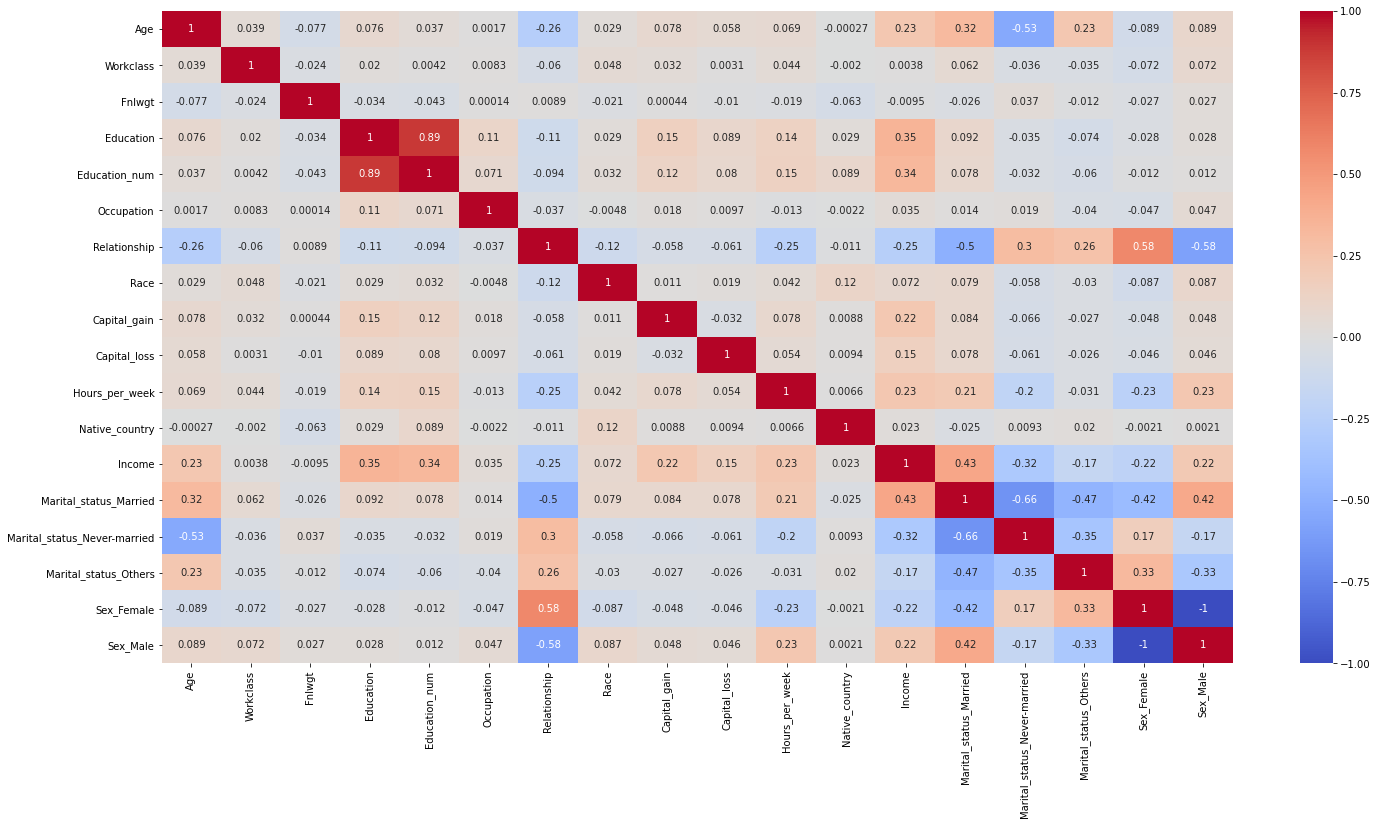

In [64]:
# checking correlation
plt.figure(figsize=(24,12))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")

#### Observations:
- Target variable "Income" is highly correlated with Marital_status_Married, Marital_status_Never-married, Education, Education_num. 
- Income is least correlated with Workclass, Fnlwgt and Native_country.
- Education and Education_num are highly correlated with each other as we know that they represent the same categories. We can drop Education_num, as its least correlated with Income as compared to Education.
- Relationship attribute is highly correlated with Sex_Female, Sex_Male, Marital_status_Married. We can drop Relationship attribute for better model building.
- Also Age is highly correlated with Marital_status_Never-married.
- This high correlation between independents attributes may cause multicollinearity problem.

In [65]:
#Creating function to calculate vif to find the highly correlated columns 
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(dataset):
    vif=pd.DataFrame()
    vif["Features"]=dataset.columns
    vif["VIF_value"]=[variance_inflation_factor(dataset.values,i) for i in range(dataset.shape[1])]
    
    return vif

In [66]:
features=df.drop("Income",axis=1)
calculate_vif(features)

,Features,VIF_value
0,Age,1.483670
1,Workclass,1.011213
2,Fnlwgt,1.014053
3,Education,4.975553
4,Education_num,4.929731
5,Occupation,1.018501
6,Relationship,1.809966
7,Race,1.031460
8,Capital_gain,1.037320
9,Capital_loss,1.018225


- Here we see that Education and Education_num have high variance inflation. After dropping Education_num, it will be corrected.

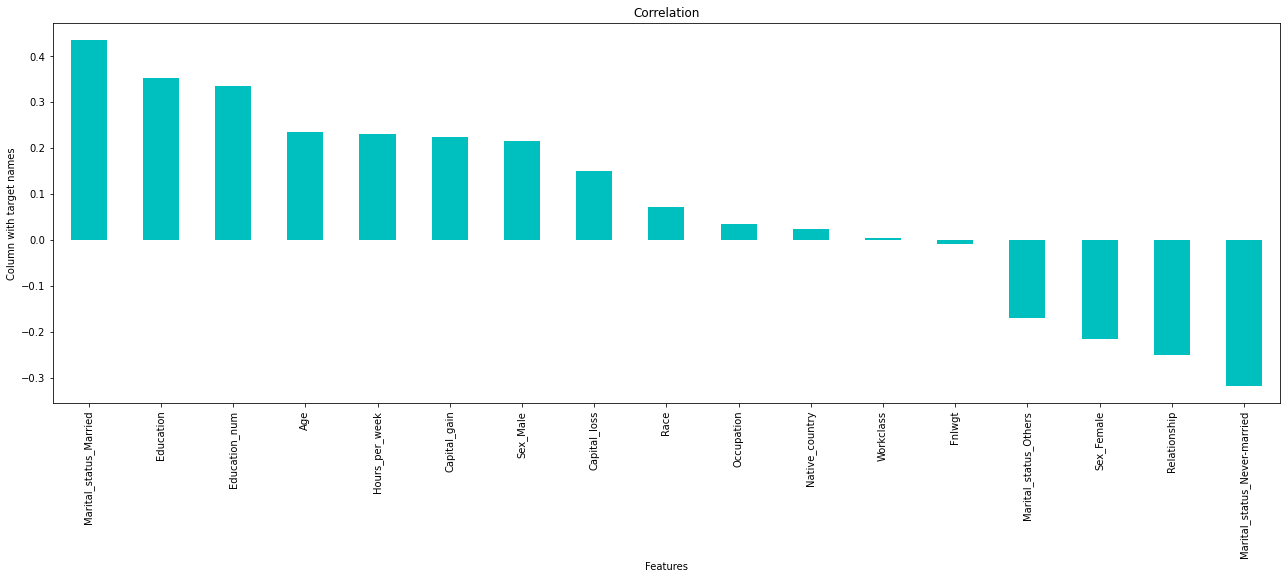

In [67]:
#Plotting bar graph to see strong and weak correlation in graphical form.
plt.figure(figsize=(22,7))
df.corr()['Income'].sort_values(ascending=False).drop(['Income']).plot(kind="bar",color='c')
plt.xlabel("Features")
plt.ylabel("Column with target names")
plt.title("Correlation")
plt.show()

- From this also we can say that Income is least correlated with Workclass and Fnlwgt.

### Deleting Unwanted Columns

- Dropping Education_num as we have Education column with the same information. Also Education is highly correlated with our target variable.

In [68]:
df=df.drop(["Education_num"],axis=1)

### Removing Outliers

In [69]:
#removing outliers for "Age",'Fnlwgt','Capital_gain' columns
from scipy.stats import zscore
z=np.abs(zscore(df[["Age",'Capital_gain',"Fnlwgt"]]))
df_new=df[(z<3).all(axis=1)]

#### Plotting boxplots after removing outliers

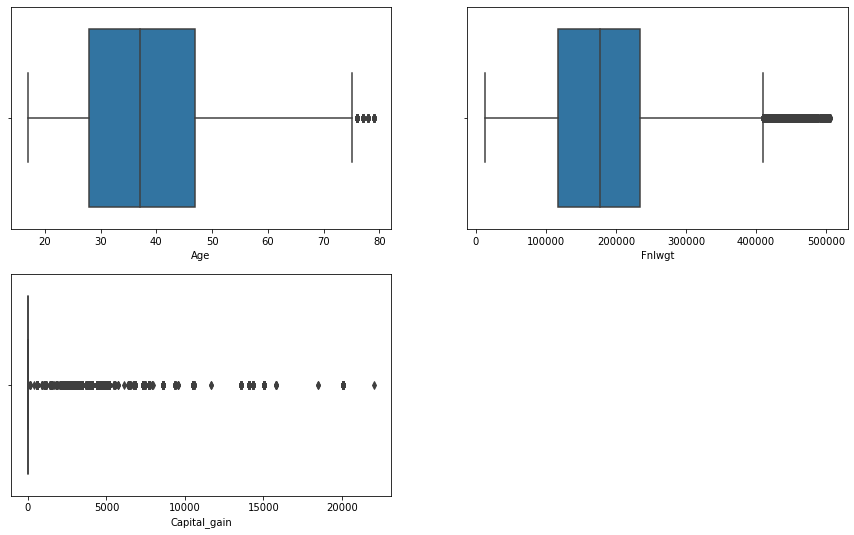

In [70]:
plt.figure(figsize=(15,9))

plt.subplot(2,2,1)
sns.boxplot(df_new["Age"])
plt.subplot(2,2,2)
sns.boxplot(df_new["Fnlwgt"])
plt.subplot(2,2,3)
sns.boxplot(df_new["Capital_gain"]);

- Even after removing outliers, there are some present.

In [71]:
# checking the number of rows and columns after removing outliers
df_new.shape

(31880, 17)

- After removing outliers we have 31880 rows and 17 columns.

### Percentage of data loss:

In [72]:
# checking percentage of data loss
data_loss=(df.shape[0]-df_new.shape[0])/df.shape[0]*100
print("{:.2f}".format(data_loss),"%")

2.09 %


- There is 2.09% of data loss with the outlier removal. To some extent outliers are removed

### Creating X an Y Split

In [73]:
# Splitting data into X and Y
x=df_new.drop("Income",axis=1)
y=df_new["Income"]

In [74]:
x.head()

,Age,Workclass,Fnlwgt,Education,Occupation,Relationship,Race,Capital_gain,Capital_loss,Hours_per_week,Native_country,Marital_status_Married,Marital_status_Never-married,Marital_status_Others,Sex_Female,Sex_Male
0,50,5,83311,3,3,0,4,0,0,13,38,1,0,0,0,1
1,38,3,215646,1,5,1,4,0,0,40,38,0,0,1,0,1
2,53,3,234721,1,5,0,2,0,0,40,38,1,0,0,0,1
3,28,3,338409,3,9,5,2,0,0,40,4,1,0,0,1,0
4,37,3,284582,4,3,5,4,0,0,40,38,1,0,0,1,0


### Treating Imbalanced Data

from imblearn.under_sampling import NearMiss
NR=NearMiss()
x,y=NR.fit_resample(x,y)

In [75]:
# Doing over sampling
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x,y=SM.fit_resample(x,y)

In [76]:
# checking value counts for target variable after balancing data
y.value_counts()

1    24341
0    24341
Name: Income, dtype: int64

- Now, our target variable is balanced.

### Checking and Removing Skewness

In [77]:
# skewness before removing outliers
df.skew()

Age                              0.558738
Workclass                        0.063147
Fnlwgt                           1.446972
Education                        0.991681
Occupation                       0.000536
Relationship                     0.786784
Race                            -2.435332
Capital_gain                    11.953690
Capital_loss                     4.594549
Hours_per_week                   0.227636
Native_country                  -4.243083
Income                           1.212383
Marital_status_Married           0.106174
Marital_status_Never-married     0.732408
Marital_status_Others            1.512361
Sex_Female                       0.719244
Sex_Male                        -0.719244
dtype: float64

- This is the skewness before removing outliers.

In [78]:
# skewness after removing outliers
x.skew()

Age                             0.256456
Workclass                      -0.126548
Fnlwgt                          0.642117
Education                       0.786128
Occupation                      0.017555
Relationship                    1.129891
Race                           -2.484234
Capital_gain                    3.520748
Capital_loss                    3.714845
Hours_per_week                  0.127979
Native_country                 -4.304204
Marital_status_Married         -0.290016
Marital_status_Never-married    1.370076
Marital_status_Others           2.185868
Sex_Female                      1.308069
Sex_Male                       -0.820250
dtype: float64

- We can ignore the skewness of categorical columns. After removing outliers from numerical columns, skewness is reduced. Let's remove it further. Here we have skewness for the below columns:
 - Fnlwgt
 - Capital_gain
 - Capital_loss

In [82]:
from sklearn.preprocessing import PowerTransformer

In [83]:
# Power Transformation to remove skewness
PT=PowerTransformer()
data_PT=PT.fit_transform(x)
x=pd.DataFrame(data_PT,columns=x.columns)

In [84]:
x.skew()

Age                            -0.032666
Workclass                       0.186806
Fnlwgt                         -0.030694
Education                       0.002175
Occupation                     -0.208888
Relationship                    0.362755
Race                           -1.938060
Capital_gain                    2.379477
Capital_loss                    3.508368
Hours_per_week                  0.273531
Native_country                 -2.776449
Marital_status_Married         -0.290016
Marital_status_Never-married    1.370076
Marital_status_Others           2.185868
Sex_Female                      1.308069
Sex_Male                       -0.820250
dtype: float64

- Now, the all the skew values are between -0.5 to +0.5.

### Scaling

- As we have done Power Transformation, there is no need of Scaling as standardize is True for PowerTransformer object. Hence, the model will not be biased.
- As we have only 16 features in our dataset, we will not perform PCA.

## Building the Model

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn import metrics

### Finding Best Random_State

In [86]:
from sklearn.linear_model import LogisticRegression
maxAcc=0
maxRS=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    mod=LogisticRegression()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc > maxAcc:
        maxAcc=acc
        maxRS=i
        
print("Best Accuracy is ",maxAcc," on Random State ",maxRS)

Best Accuracy is  0.8447791852105443  on Random State  113


- Using the best Random State to create new train_test_split.

In [87]:
#here we going to split data in traing set and testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [88]:
#Importing the packages to build models
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

#### 1.LogisticRegression

In [89]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
pred=LR.predict(x_test)
class_report=classification_report(y_test,pred)
cm=confusion_matrix(y_test,pred)
acc=accuracy_score(y_test,pred)*100
print("Confusion Matrix\n",cm,"\n")
print("Accuracy Score:",acc)
print(class_report)

Confusion Matrix
 [[5999 1285]
 [ 982 6339]] 

Accuracy Score: 84.47791852105443
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      7284
           1       0.83      0.87      0.85      7321

    accuracy                           0.84     14605
   macro avg       0.85      0.84      0.84     14605
weighted avg       0.85      0.84      0.84     14605



#### 2.AdaBoostClassifier

In [90]:
AD=AdaBoostClassifier()
AD.fit(x_train,y_train)
pred=AD.predict(x_test)
class_report=classification_report(y_test,pred)
cm=confusion_matrix(y_test,pred)
acc=accuracy_score(y_test,pred)*100
print("Confusion Matrix\n",cm,"\n")
print("Accuracy Score:",acc)
print(class_report)

Confusion Matrix
 [[6140 1144]
 [ 755 6566]] 

Accuracy Score: 86.99760356042451
              precision    recall  f1-score   support

           0       0.89      0.84      0.87      7284
           1       0.85      0.90      0.87      7321

    accuracy                           0.87     14605
   macro avg       0.87      0.87      0.87     14605
weighted avg       0.87      0.87      0.87     14605



#### 3.RandomForestClassifier

In [91]:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
pred=RFC.predict(x_test)
class_report=classification_report(y_test,pred)
cm=confusion_matrix(y_test,pred)
acc=accuracy_score(y_test,pred)*100
print("Confusion Matrix\n",cm,"\n")
print("Accuracy Score:",acc)
print(class_report)

Confusion Matrix
 [[6470  814]
 [ 807 6514]] 

Accuracy Score: 88.90106128038343
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      7284
           1       0.89      0.89      0.89      7321

    accuracy                           0.89     14605
   macro avg       0.89      0.89      0.89     14605
weighted avg       0.89      0.89      0.89     14605



#### 4.SVC

In [92]:
SC=SVC()
SC.fit(x_train,y_train)
pred=SC.predict(x_test)
class_report=classification_report(y_test,pred)
cm=confusion_matrix(y_test,pred)
acc=accuracy_score(y_test,pred)*100
print("Confusion Matrix\n",cm,"\n")
print("Accuracy Score:",acc)
print(class_report)

Confusion Matrix
 [[5978 1306]
 [ 712 6609]] 

Accuracy Score: 86.18281410475865
              precision    recall  f1-score   support

           0       0.89      0.82      0.86      7284
           1       0.83      0.90      0.87      7321

    accuracy                           0.86     14605
   macro avg       0.86      0.86      0.86     14605
weighted avg       0.86      0.86      0.86     14605



#### 5.DecisionTreeClassifier

In [93]:
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)
pred=DTC.predict(x_test)
class_report=classification_report(y_test,pred)
cm=confusion_matrix(y_test,pred)
acc=accuracy_score(y_test,pred)*100
print("Confusion Matrix\n",cm,"\n")
print("Accuracy Score:",acc)
print(class_report)

Confusion Matrix
 [[6150 1134]
 [1110 6211]] 

Accuracy Score: 84.63539883601506
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      7284
           1       0.85      0.85      0.85      7321

    accuracy                           0.85     14605
   macro avg       0.85      0.85      0.85     14605
weighted avg       0.85      0.85      0.85     14605



Here, we observe that RandomForestClassifier is giving the highest accuracy score of 89%. But we all know, it may or may not be due to overfitting, we are not sure about this. So we cannot confirm it as the best model. To be sure about the best model, we will go for the Cross Validation Sc

### Cross Validation Score

In [94]:
# importing cross validation module
from sklearn.model_selection import cross_val_score

In [95]:
print(cross_val_score(LR,x,y,cv=5).mean()) #cross validation score for LogisticRegression

0.8329791195373406


In [96]:
print(cross_val_score(AD,x,y,cv=5).mean()) #cross validation score for AdaBoostClassifier

0.8583479698485957


In [97]:
print(cross_val_score(RFC,x,y,cv=5).mean()) #cross validation score for RandomForestClassifier

0.8771644159218169


In [98]:
print(cross_val_score(SC,x,y,cv=5).mean()) #cross validation score for SVC

0.8471529723933366


In [99]:
print(cross_val_score(DTC,x,y,cv=5).mean()) #cross validation score for DecisionTreeClassifier

0.8385668281219237


- Here we observe that after doing cross validation RandomForestClassifier is giving the least difference. We can definitely consider it as our best model.

### Hyper Parameter Tuning

- Now, let's apply Hyper Paramter Tuning on the best model to improve the accuracy score.

In [100]:
# importing GridSearchCV module
from sklearn.model_selection import GridSearchCV

In [101]:
parameters={'n_estimators':[50,60,80,100,110],
          'criterion':['gini','entropy'],
          'max_depth':[4,5,6,7,8,9],
          'min_samples_split':[10,12,15,17]}

In [102]:
GCVRFC=GridSearchCV(RandomForestClassifier(),parameters,cv=5)
GCVRFC.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9],
                         'min_samples_split': [10, 12, 15, 17],
                         'n_estimators': [50, 60, 80, 100, 110]})

In [103]:
GCVRFC.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'min_samples_split': 10,
 'n_estimators': 60}

In [106]:
Final_modRFC=RandomForestClassifier(criterion='gini',max_depth=9,min_samples_split=10,n_estimators=60)
Final_modRFC.fit(x_train,y_train)
pred=Final_modRFC.predict(x_test)
class_report=classification_report(y_test,pred)
cm=confusion_matrix(y_test,pred)
acc=accuracy_score(y_test,pred)*100
print("Confusion Matrix\n",cm,"\n")
print("Accuracy Score:",acc)
print(class_report)

Confusion Matrix
 [[6189 1095]
 [ 834 6487]] 

Accuracy Score: 86.79219445395412
              precision    recall  f1-score   support

           0       0.88      0.85      0.87      7284
           1       0.86      0.89      0.87      7321

    accuracy                           0.87     14605
   macro avg       0.87      0.87      0.87     14605
weighted avg       0.87      0.87      0.87     14605



- After Hyper Parameter tuning, the improved score of the best model RandomForestClassifier is 87%

### Plotting AUC_ROC curve

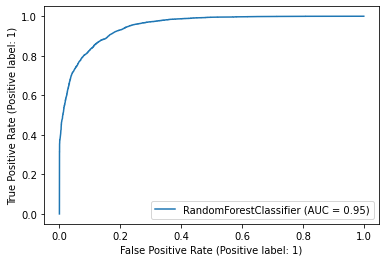

In [107]:
metrics.plot_roc_curve(Final_modRFC, x_test, y_test)

- The AUC score is 0.95

## Saving the Model

In [109]:
import joblib
joblib.dump(Final_modRFC,"Census_Income.pkl")

['Census_Income.pkl']